## Preamble

In [64]:
# import matplotlib.pyplot as plt
import importlib

__author__ = "Carlos del-Castillo-Negrete"
__copyright__ = "Carlos del-Castillo-Negrete"
__license__ = "mit"

seed = 123

<a id='Title'></a>
# <center> MUD Problem Class
_____

<center>
    Notebook by:
    <br>
    Carlos del-Castillo-Negrete (<font color='blue'>cdelcastillo21@gmail.com</font>)
</center>

The MUDProblem class extends the DCIProblem class for parameter estimation, as first proposed in [1].

# <a id='Title'></a>
## Data-Consistent Update Formula: 

$\Large \pi_{up}(\lambda) = \pi_{in}(\lambda)\frac{\pi_{ob}(Q(\lambda))}{\pi_{pred}(Q(\lambda))}$


Note:

* $\pi_{in}$ represents initial descripton of aleatoric, or irreducible, uncertainty on $\Lambda$.

* Data-Consistent comes from Disintegration theorem and Bayes rule [ref].


## Example 1 - Low Dimensional Example
---

We start with a simple QoI map over a one-dimensional parameter space:
   
   $$ \Large \Lambda = [-1, 1] \in \mathbb{R} $$  
   
   $$ \Large Q(\lambda) = \lambda^5 \rightarrow \mathcal{D} = [-1, 1] $$

We assume:

   $\pi_{in} \sim \mathcal{U}([-1, 1])$
  
   $\pi_{ob} \sim \mathcal{N}(0.25,0.1^2)$

In [1]:
from scipy.stats.distributions import uniform, norm
import numpy as np

np.random.seed(123)

p, num_samples, mu, std_dev, domain = 5, int(1e3), 0.25, 0.1, [-1, 1]
lam = uniform.rvs(size=(num_samples, 1), loc=domain[0],
                  scale=domain[1] - domain[0])
q_lam = (lam**p).reshape(num_samples, -1)
data = np.array([0.25])
lam.shape, q_lam.shape, data.shape

((1000, 1), (1000, 1), (1,))

In [2]:
from pydci import MUDProblem

mud_prob = MUDProblem((lam, q_lam), data, std_dev)
mud_prob.solve()
mud_prob.result

,e_r,kl,lam_MUD_0
0,0.79988,2.128742,0.779117


In [4]:
mud_prob.state

,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,q_lam_0,lam_0
0,1.0,0.493169,3.242866,2.205669e-01,6.801605e-02,3.354339e-02,0.009367,0.392938
1,1.0,0.533752,3.228581,1.213003e-01,3.757078e-02,2.005347e-02,-0.014315,-0.427721
2,1.0,0.498293,2.794093,4.613651e-02,1.651216e-02,8.227898e-03,-0.048657,-0.546297
3,1.0,0.508300,3.267662,1.753329e-01,5.365699e-02,2.727386e-02,0.000011,0.102630
4,1.0,0.484622,3.199445,2.599441e-01,8.124662e-02,3.937393e-02,0.016294,0.438938
...,...,...,...,...,...,...,...,...
995,1.0,0.522151,3.158518,9.545637e-02,3.022189e-02,1.578038e-02,-0.023230,-0.471205
996,1.0,0.494884,3.248465,2.140081e-01,6.587977e-02,3.260285e-02,0.008116,0.381831
997,1.0,0.554388,3.267435,1.639058e-01,5.016346e-02,2.781000e-02,-0.002670,-0.305708
998,1.0,0.254334,0.079769,7.255706e-32,9.095888e-31,2.313394e-31,-0.959004,-0.991663


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\mathcal{D}$', ylabel='Density'>], dtype=object)

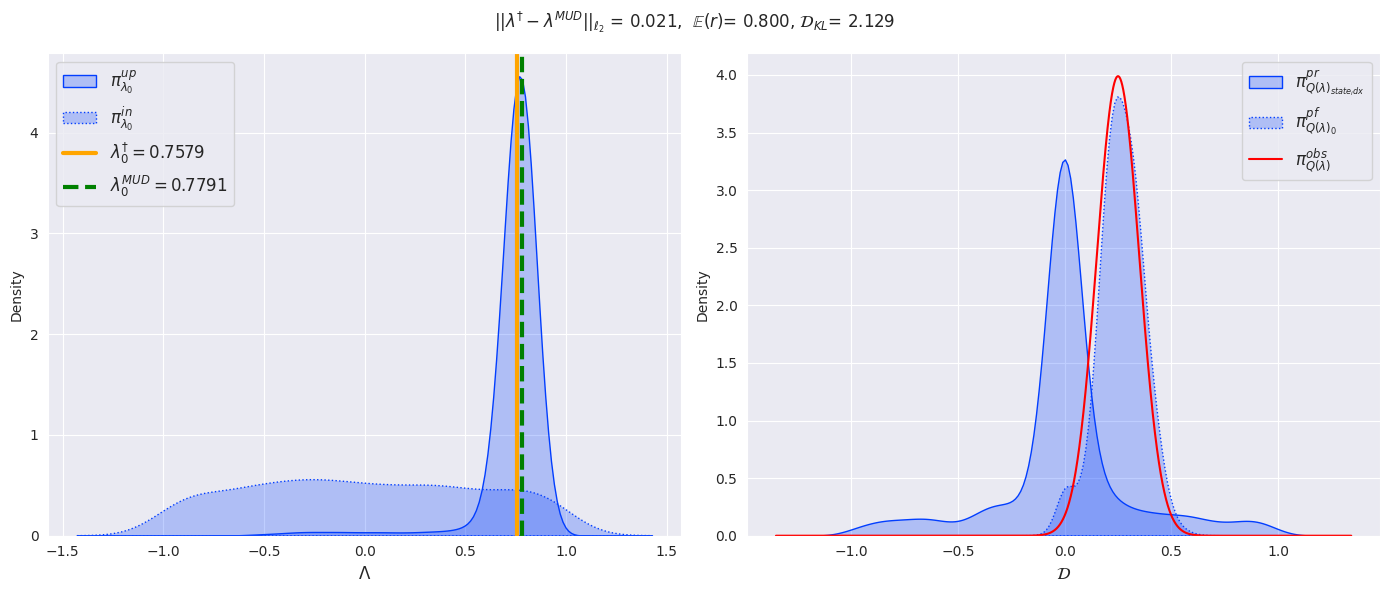

In [5]:
mud_prob.density_plots(lam_kwargs={'lam_true': [[0.25**0.2]]})

# PCA MUD Problem

In [9]:
from pydci import ConsistentBayes as CB

importlib.reload(CB)
pca_prob = CB.PCAMUDProblem(lam, q_lam, data, sigma)
pca_prob.solve()

In [10]:
pca_prob.state

,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,lam_0,q_lam_0,q_pca_0
0,1.0,0.493169,0.324287,2.205669e-02,6.801605e-02,3.354339e-02,0.392938,0.009367,2.406325
1,1.0,0.533752,0.322858,1.213003e-02,3.757078e-02,2.005347e-02,-0.427721,-0.014315,2.643154
2,1.0,0.498293,0.279409,4.613651e-03,1.651216e-02,8.227898e-03,-0.546297,-0.048657,2.986569
3,1.0,0.508300,0.326766,1.753329e-02,5.365699e-02,2.727386e-02,0.102630,0.000011,2.499886
4,1.0,0.484622,0.319944,2.599441e-02,8.124662e-02,3.937393e-02,0.438938,0.016294,2.337065
...,...,...,...,...,...,...,...,...,...
995,1.0,0.522151,0.315852,9.545637e-03,3.022189e-02,1.578038e-02,-0.471205,-0.023230,2.732300
996,1.0,0.494884,0.324847,2.140081e-02,6.587977e-02,3.260285e-02,0.381831,0.008116,2.418838
997,1.0,0.554388,0.326743,1.639058e-02,5.016346e-02,2.781000e-02,-0.305708,-0.002670,2.526701
998,1.0,0.254334,0.007977,7.255706e-33,9.095888e-31,2.313394e-31,-0.991663,-0.959004,12.090044


In [11]:
pca_prob.result

,e_r,kl,lam_MUD_0,predict_delta,within_thresh,closest,max_kl,min_kl
nc,,,,,,,,
1,0.79988,2.128742,0.779117,0.20012,True,True,True,True


In [12]:
pca_prob.pca_result

,e_r,kl,lam_MUD_0,predict_delta,within_thresh,closest,max_kl,min_kl
nc,,,,,,,,
1,0.79988,2.128742,0.779117,0.20012,True,True,True,True


In [641]:
pca_prob.pca_states[0]

,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,lam_0,q_lam_0,q_pca_0
0,1.0,0.493169,0.324287,2.205669e-02,6.801605e-02,3.354339e-02,0.392938,0.009367,2.406325
1,1.0,0.533752,0.322858,1.213003e-02,3.757078e-02,2.005347e-02,-0.427721,-0.014315,2.643154
2,1.0,0.498293,0.279409,4.613651e-03,1.651216e-02,8.227898e-03,-0.546297,-0.048657,2.986569
3,1.0,0.508300,0.326766,1.753329e-02,5.365699e-02,2.727386e-02,0.102630,0.000011,2.499886
4,1.0,0.484622,0.319944,2.599441e-02,8.124662e-02,3.937393e-02,0.438938,0.016294,2.337065
...,...,...,...,...,...,...,...,...,...
995,1.0,0.522151,0.315852,9.545637e-03,3.022189e-02,1.578038e-02,-0.471205,-0.023230,2.732300
996,1.0,0.494884,0.324847,2.140081e-02,6.587977e-02,3.260285e-02,0.381831,0.008116,2.418838
997,1.0,0.554388,0.326743,1.639058e-02,5.016346e-02,2.781000e-02,-0.305708,-0.002670,2.526701
998,1.0,0.254334,0.007977,7.255706e-33,9.095888e-31,2.313394e-31,-0.991663,-0.959004,12.090044


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\mathcal{D}$', ylabel='Density'>], dtype=object)

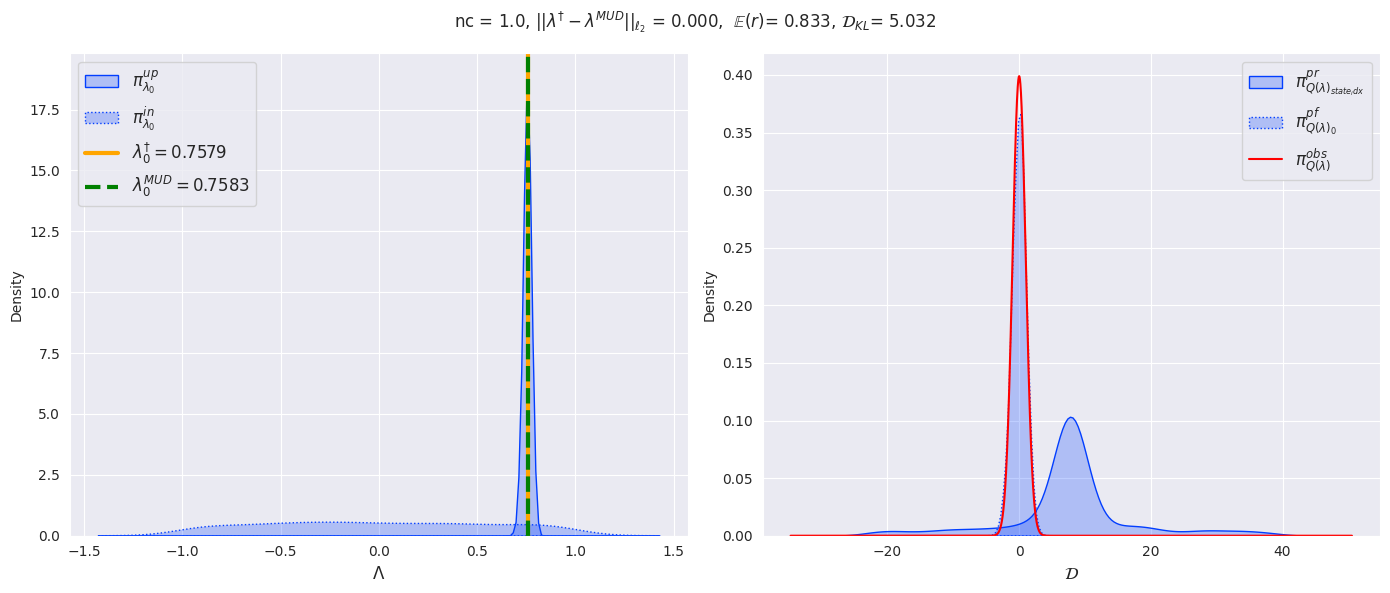

In [240]:
pca_prob.density_plots(lam_kwargs={'lam_true': [[0.25**0.2]]})

# Sequential PCA


In [680]:
from pydci import ConsistentBayes as CB
from pydci.log import enable_log

enable_log()

importlib.reload(CB)
seq_prob = CB.SequentialProblem(lam, q_lam, data, sigma)
seq_prob.solve(num_splits=4)

[04/10/23 19:25:29] INFO     Logger initialized                                                           ]8;id=409731;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=51521;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#35\35]8;;\

                    INFO     Re-initializing problem with split #0                          ]8;id=767948;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=618084;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1387\1387]8;;\

                    INFO     all: Trying 1 qoi combs.                                       ]8;id=954293;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=309361;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1399\1399]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                       ]8;id=233539;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=706133;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#185\185]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=33368;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=121270;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=881536;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=220437;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

                    INFO     Update: setting pi_up -> pi_in, ratio -> weights               ]8;id=244589;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=103258;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1444\1444]8;;\

                    INFO     Re-initializing problem with split #1                          ]8;id=395304;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=304450;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1387\1387]8;;\

/opt/conda/envs/pyDCI/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/envs/pyDCI/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


                    INFO     all: Trying 1 qoi combs.                                       ]8;id=309902;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=58952;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1399\1399]8;;\

ValueError: Found array with 0 feature(s) (shape=(1000, 0)) while a minimum of 1 is required by StandardScaler.

In [308]:
seq_prob.state

,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,lam_0,q_lam_0,q_lam_1,q_pca_0
0,4.166863e-03,5.394014e-03,4.973700e-03,1.459443e-03,2.934320e-01,6.595212e-06,0.392938,0.009367,0.009367,3.349854
1,1.636548e-03,2.054323e-03,3.357280e-03,4.493338e-04,1.338386e-01,4.499652e-07,-0.427721,-0.014315,-0.014315,3.684781
2,7.801190e-04,1.194057e-03,1.147612e-03,6.670470e-05,5.812476e-02,5.414361e-08,-0.546297,-0.048657,-0.048657,4.170443
3,2.770018e-03,3.639718e-03,4.339135e-03,9.287322e-04,2.140362e-01,2.157931e-06,0.102630,0.000011,0.000011,3.482169
4,5.802259e-03,7.541159e-03,5.495006e-03,2.016522e-03,3.669736e-01,1.605721e-05,0.438938,0.016294,0.016294,3.251905
...,...,...,...,...,...,...,...,...,...,...
995,1.258766e-03,1.435503e-03,2.723222e-03,2.801355e-04,1.028691e-01,1.858807e-07,-0.471205,-0.023230,-0.023230,3.810853
996,3.934731e-03,5.093501e-03,4.886213e-03,1.375232e-03,2.814514e-01,5.640724e-06,0.381831,0.008116,0.008116,3.367549
997,2.486553e-03,3.874500e-03,4.159645e-03,8.132586e-04,1.955115e-01,1.883588e-06,-0.305708,-0.002670,-0.002670,3.520092
998,5.314416e-48,1.774052e-20,5.560072e-43,3.272646e-64,5.885979e-22,5.549331e-89,-0.991663,-0.959004,-0.959004,17.044701


In [309]:
seq_prob.states['results'][2]

,,nc,lam_MUD_0,e_r,kl,predict_delta,within_thresh,closest,max_kl,min_kl
0,0,1.0,0.765426,0.971269,3.482432,0.028731,True,True,True,True


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\mathcal{D}$', ylabel='Density'>], dtype=object)

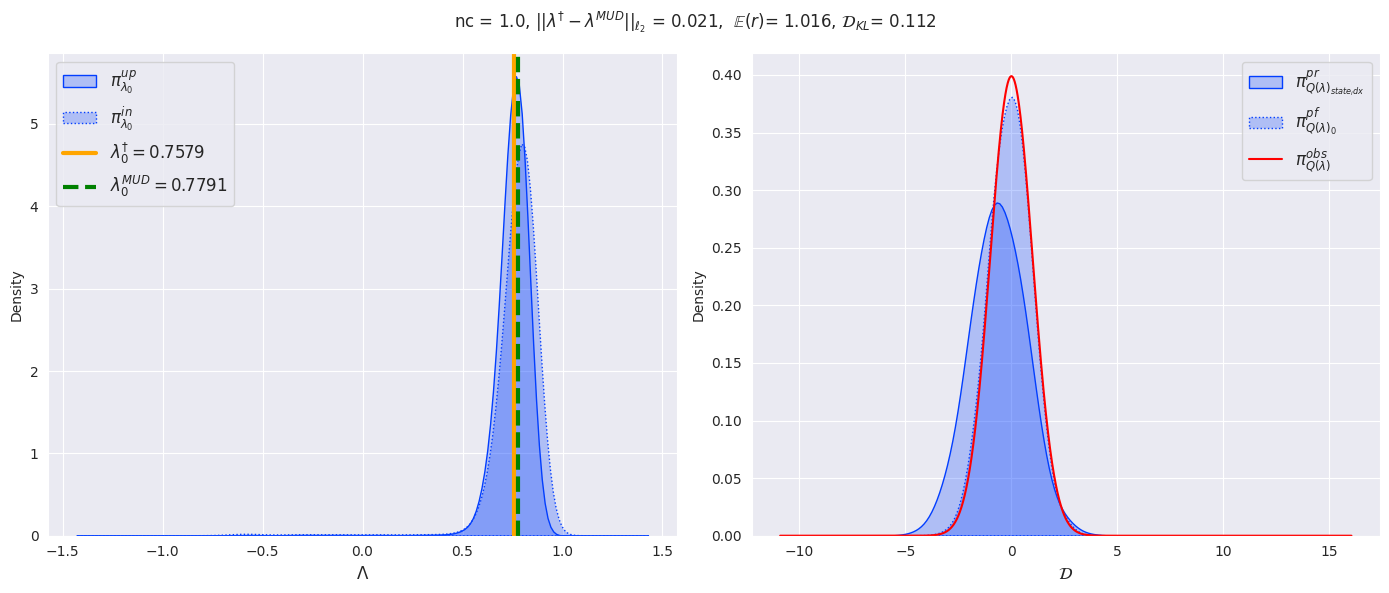

In [297]:
seq_prob.density_plots(lam_kwargs={'lam_true': [[0.25**0.2]]})

# Dynamic Sequential Estimation

In [775]:
from pydci import Model
import pdb

importlib.reload(Model)

class MonomialModel(Model.DynamicModel):
    
    def __init__(self,
                 p,
                 x0=[0, 0], # Note in the constant monomial case, initial state won't matter
                 lam_true=[0.75, 0.25],
                 solve_ts=1.0,
                 sample_ts=1.0,
                 measurement_noise=0.1,
                 **kwargs
                ):
        self.p = p
        super().__init__(x0, lam_true,
                         solve_ts=solve_ts,
                         sample_ts=sample_ts,
                         measurement_noise=measurement_noise,
                         **kwargs)

        
    def forward_model(
        self,
        x0,
        times,
        lam,
    ):
        """
        Monomial Forward Model
        """
        return np.array([lam[0]**p, lam[1]**p])
    
mm = MonomialModel(5)
lam = mm.get_uniform_initial_samples(scale=0.5)
args = mm.forward_solve(10, samples=lam)

[04/10/23 20:49:49] INFO     Drawing 1000 from uniform at:                                             ]8;id=888140;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=306877;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#234\234]8;;\
                                     loc: [0.375 0.125]                                                            
                                     scale: [0.75 0.25]                                                            

Solving model sample set: |████████████████████| 1000/1000 [100%] in 0.0s (70570


In [792]:
from pydci import ConsistentBayes as CB
from pydci.log import enable_log, disable_log

enable_log()

importlib.reload(CB)
seq_prob = CB.SequentialProblem(lam, args['q_lam'], args['data'], args['std_dev'])
seq_prob.solve(num_splits=1,
               qoi_method='all')

[04/10/23 21:03:51] INFO     Logger initialized                                                           ]8;id=559758;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=120843;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#35\35]8;;\

                    INFO     Re-initializing problem with split #0                          ]8;id=197876;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=674980;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1397\1397]8;;\

                    INFO     all: Trying 1 qoi combs.                                       ]8;id=229307;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=739396;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1408\1408]8;;\

                    INFO     Solving using 1 components                                     ]8;id=126845;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=873878;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1042\1042]8;;\

                    INFO     Calculating pi_in by computing KDE on lam                       ]8;id=685648;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=67734;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#185\185]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=769290;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=588703;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

                    INFO     Solving using 2 components                                     ]8;id=788285;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=411539;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1042\1042]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=265391;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=319089;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

                    INFO     Solving using 1 components                                     ]8;id=303168;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=578401;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1042\1042]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=749610;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=17431;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

                    INFO     Solving using 2 components                                     ]8;id=818254;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=759738;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#1042\1042]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                     ]8;id=132882;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py\ConsistentBayes.py]8;;\:]8;id=621218;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py#206\206]8;;\

In [793]:
seq_prob.result

,,,e_r,kl,lam_MUD_0,lam_MUD_1,predict_delta,within_thresh,closest,max_kl,min_kl
iteration,nc,qoi_comb,,,,,,,,,
0,1,11111111111111111111,0.816525,1.615787,0.75601,0.28642,0.183475,True,True,True,True


In [794]:
seq_prob.results

e_r        kl  lam_MUD_0  lam_MUD_1  \
iteration nc qoi_comb                                                         
0         1  11111111111111111111  0.816525  1.615787    0.75601   0.286420   
          2  11111111111111111111  0.082317  2.117967    0.75705   0.366521   

                                   predict_delta  within_thresh  closest  \
iteration nc qoi_comb                                                      
0         1  11111111111111111111       0.183475           True     True   
          2  11111111111111111111       0.917683          False    False   

                                   max_kl  min_kl  
iteration nc qoi_comb                              
0         1  11111111111111111111    True    True  
          2  11111111111111111111   False   False

In [ ]:
seq_prob.density_plots()

> /home/jupyter/MyData/repos/pyDCI/src/pydci/ConsistentBayes.py(1257)_parse_title()
   1255                     f" = {l2_err:.3f},  " + title
   1256         pdb.set_trace()
-> 1257         nc = self.result['nc'].values[0] if nc is None else nc
   1258         title = f"nc = {nc}, " + title
   1259 



ipdb>  self.result['nc']


*** KeyError: 'nc'


ipdb>  self.result


                                        e_r        kl  lam_MUD_0  lam_MUD_1  \
iteration nc qoi_comb                                                         
0         1  11111111111111111111  0.816525  1.615787    0.75601    0.28642   

                                   predict_delta  within_thresh  closest  \
iteration nc qoi_comb                                                      
0         1  11111111111111111111       0.183475           True     True   

                                   max_kl  min_kl  
iteration nc qoi_comb                              
0         1  11111111111111111111    True    True  


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\mathcal{D}$', ylabel='Density'>], dtype=object)

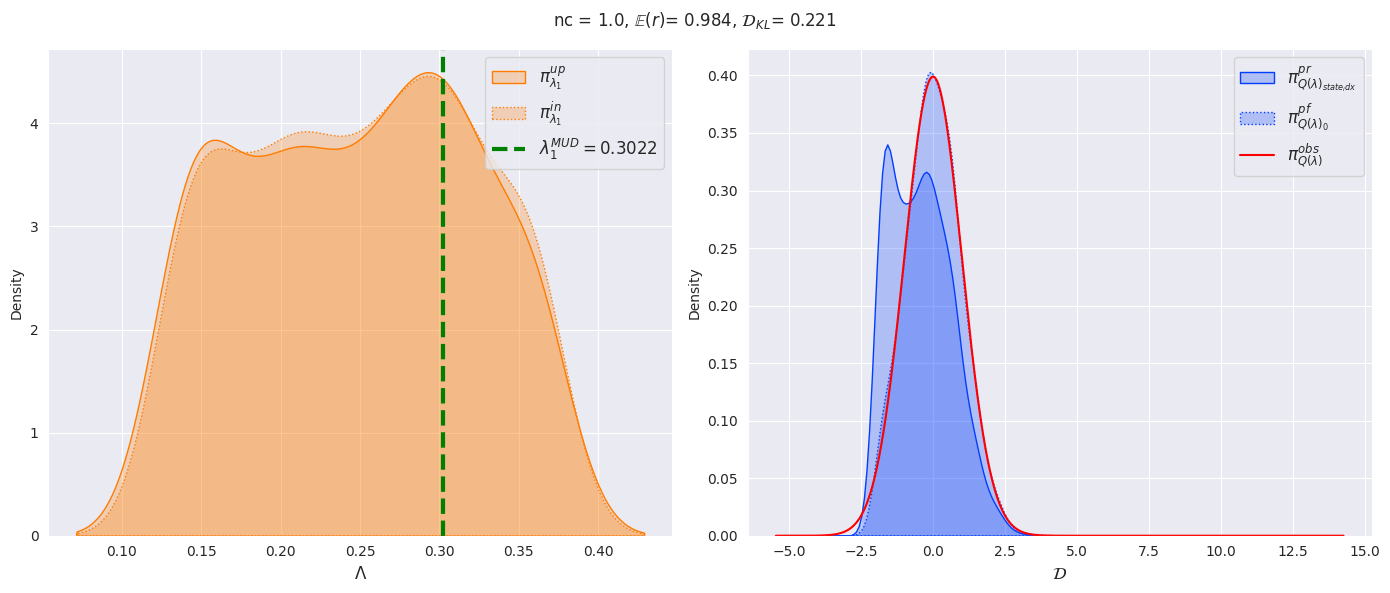

In [ ]:
kwargs = {'param_idx': 1}
seq_prob.density_plots(lam_kwargs={'param_idx': 1}, q_lam_kwargs=None)

In [67]:
from pydci import ConsistentBayes as CB

importlib.reload(CB)
mud_prob = CB.MUDProblem(lam, q_lam, data, sigma)
mud_prob.solve()

In [68]:
mud_prob.state

,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,lam_0,q_lam_0
0,1.0,0.493169,3.242866,2.205669e-01,6.801605e-02,3.354339e-02,0.392938,0.009367
1,1.0,0.533752,3.228581,1.213003e-01,3.757078e-02,2.005347e-02,-0.427721,-0.014315
2,1.0,0.498293,2.794093,4.613651e-02,1.651216e-02,8.227898e-03,-0.546297,-0.048657
3,1.0,0.508300,3.267662,1.753329e-01,5.365699e-02,2.727386e-02,0.102630,0.000011
4,1.0,0.484622,3.199445,2.599441e-01,8.124662e-02,3.937393e-02,0.438938,0.016294
...,...,...,...,...,...,...,...,...
995,1.0,0.522151,3.158518,9.545637e-02,3.022189e-02,1.578038e-02,-0.471205,-0.023230
996,1.0,0.494884,3.248465,2.140081e-01,6.587977e-02,3.260285e-02,0.381831,0.008116
997,1.0,0.554388,3.267435,1.639058e-01,5.016346e-02,2.781000e-02,-0.305708,-0.002670
998,1.0,0.254334,0.079769,7.255706e-32,9.095888e-31,2.313394e-31,-0.991663,-0.959004


In [69]:
mud_prob.result

,e_r,kl,lam_MUD_0
0,0.79988,2.128742,0.779117


array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\mathcal{D}$', ylabel='Density'>], dtype=object)

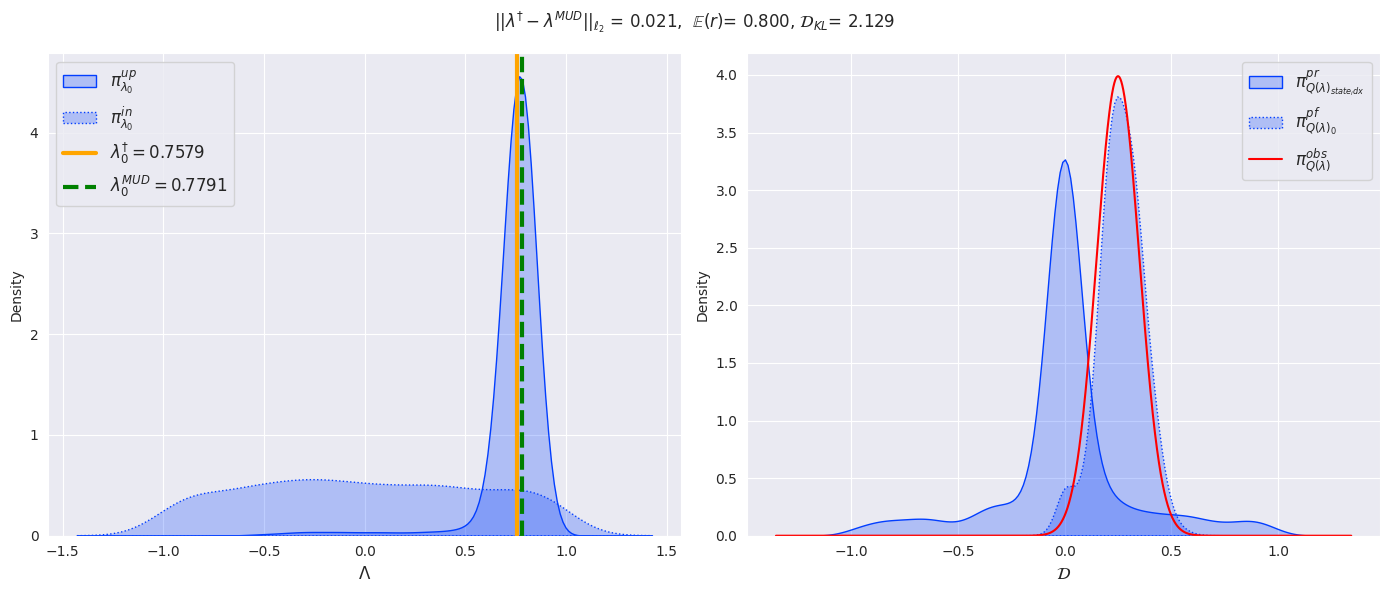

In [70]:
mud_prob.density_plots(lam_kwargs={'lam_true': [[0.25**0.2]]})